In [33]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_data = pd.read_csv("avila/avila-tr.txt", sep=",",header = None)
train_data.columns = ["intercolumnar distance","upper margin","lower margin","exploitation"," row number","modular ratio","interlinear spacing"," weight","peak number","modular ratio/ interlinear spacing","class"]

In [3]:
train_data

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [4]:
test_data = pd.read_csv("avila/avila-ts.txt", sep=",",header = None)
test_data.columns = ["intercolumnar distance","upper margin","lower margin","exploitation"," row number","modular ratio","interlinear spacing"," weight","peak number","modular ratio/ interlinear spacing","class"]

In [5]:
test_data

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [6]:
X_train = train_data[["intercolumnar distance","upper margin","lower margin","exploitation"," row number","modular ratio","interlinear spacing"," weight","peak number","modular ratio/ interlinear spacing"]]
Y_train = train_data["class"]

In [7]:
Y_train

0        A
1        A
2        A
3        A
4        F
        ..
10425    F
10426    F
10427    A
10428    E
10429    X
Name: class, Length: 10430, dtype: object

In [8]:
X_test = test_data[["intercolumnar distance","upper margin","lower margin","exploitation"," row number","modular ratio","interlinear spacing"," weight","peak number","modular ratio/ interlinear spacing"]]
Y_test = test_data["class"]

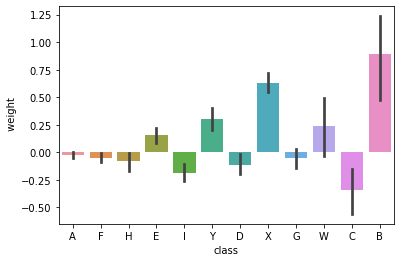

In [9]:

sns.barplot(train_data["class"],train_data[" weight"])

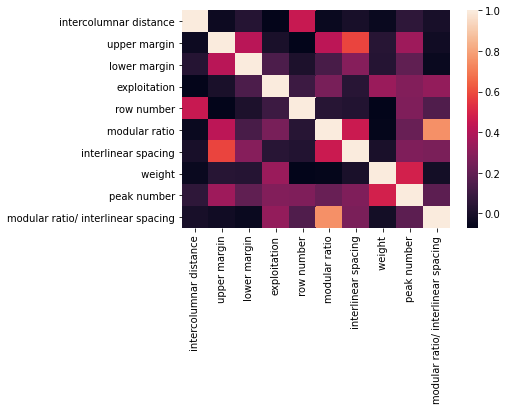

In [10]:

sns.heatmap(X_train.corr())


In [13]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

C:\Users\Jules\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

####  We reached the maximum Cross Validation value (cv) equal to 5 because the "B" class have only 5 members 

In [29]:
cross_val_score(clf, X_test, Y_test, cv=5)

array([0.96606119, 0.95408895, 0.95877277, 0.96497121, 0.95297505])

In [35]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)




In [ ]:
grid.fit(X_train,Y_train)